Для начала установим все нужные для начала библиотеки и загрузим сам датасет.
Для этого воспользуемся готовым решением на базе skylearn

In [26]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dill


np.random.seed(666)  # адский сатана

Теперь загрузим сам датасет через sklearn.datasets.fetch_openml и посмотрим на его устройство

In [18]:
mnist = fetch_openml('mnist_784', parser='pandas')

И сразу же переведем его в формат numpy

In [66]:
imgs = mnist.data.to_numpy()
target = mnist.target.to_numpy()

Выведем несколько примерров тех цифр, что присутсвуют в датасете.

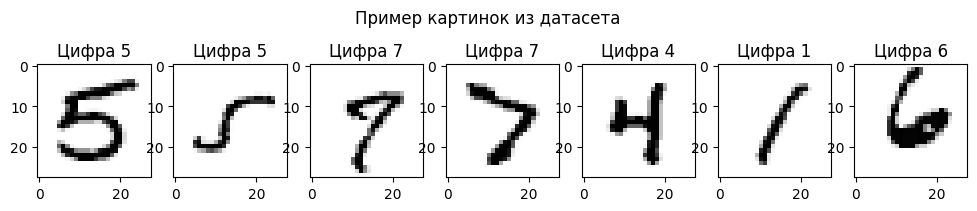

In [68]:
rands = np.random.randint(mnist.data.shape[0], size=7)
fig, axes = plt.subplots(1, 7)
fig.suptitle('Пример картинок из датасета')
fig.set_figheight(2.3)
fig.set_figwidth(12)
for i, loc in enumerate(rands):
    axes[i].set_title(f'Цифра {target[loc]}')
    axes[i] = axes[i].imshow(imgs[loc].reshape((28, 28)), cmap='Greys')
# fig

Теперь заранее определимся с используемыми метриками: Изображения можно легко воспринимать в виде квадратных вещественных матриц 28 на 28 => тогда давайте просто высчитывать норму Фробениуса для них (или же просто введем на пространстве векторов R^(28 * 28) Евклидову норму)
Для этого будем использовать метод numpy.linalg.norm с показателем 2

Теперь разобьем начальную выборку на обучающую и тестовую с учетом, что всего мы имеем 